### Class 7- Starter code


## Demo: Residual Error (15 mins)

P Values: [  9.15540205e-26]
Coefficients: [ 0.00096395]
y-intercept: 0.0859173102936
R-Squared: 0.871949198087
Mean squared error: 0.119901525171


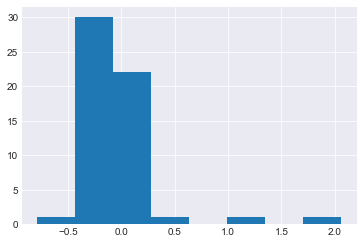

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn import linear_model, metrics

# read in the mammal dataset
wd = '../dataset/msleep/'
mammals = pd.read_csv(wd+'msleep.csv')
mammals = mammals[mammals.brainwt.notnull()].copy()

from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    print 'Mean squared error:', metrics.mean_squared_error(y, algo.predict(X))
    plt.figure()
    plt.hist(residuals, bins=int(np.ceil(np.sqrt(len(y)))))
    
    # keep the model
    return algo


X = mammals[['bodywt']]
y = mammals['brainwt']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)


## Cross validation
#### Intro to cross validation with bike share data from last time. We will be modeling casual ridership. 

In [2]:
from sklearn import cross_validation
wd = '../dataset/'
bikeshare = pd.read_csv(wd + 'bikeshare.csv')

/Users/leahgaeta/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


####Create dummy variables and set outcome (dependent) variable

In [3]:
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')  # alternative short-cut way!
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual 

In [5]:
modeldata.head()

,temp,hum,weather_1,weather_2,weather_3
0,0.24,0.81,1,0,0
1,0.22,0.80,1,0,0
2,0.22,0.80,1,0,0
3,0.24,0.75,1,0,0
4,0.24,0.75,1,0,0


#### Create a cross valiation with 5 folds

In [6]:
kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True)

In [7]:
kf

sklearn.cross_validation.KFold(n=17379, n_folds=5, shuffle=True, random_state=None)

In [23]:
mse_values = []
scores = []
n= 0
print "~~~~ CROSS VALIDATION each fold ~~~~"
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    scores.append(lm.score(modeldata, y))
    n+=1
    print 'Model', n
    print 'MSE:', mse_values[n-1]
    print 'R2:', scores[n-1]


print "~~~~ SUMMARY OF CROSS VALIDATION ~~~~"
print 'Mean of MSE for all folds:', np.mean(mse_values)
print 'Mean of R2 for all folds:', np.mean(scores)

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 1675.36956007
R2: 0.31187671319
Model 2
MSE: 1760.63709037
R2: 0.311866248622
Model 3
MSE: 1644.87187767
R2: 0.311894176931
Model 4
MSE: 1649.04519654
R2: 0.311888958325
Model 5
MSE: 1638.42192164
R2: 0.311897508303
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 1673.66912926
Mean of R2 for all folds: 0.311884721074


In [12]:
kfolds = range(2,51,2)
mean_mse = []
mean_r2 = []
for each_fold in kfolds:
    kf = cross_validation.KFold(len(modeldata), n_folds=each_fold, shuffle=True)
    mse_values = []
    scores = []
    n= 0
    for train_index, test_index in kf:
        lm = linear_model.LinearRegression().fit(modeldata.iloc[train_index], y.iloc[train_index])
        mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
        scores.append(lm.score(modeldata, y))
        n+=1


# stores the mean of the MSE and R2
    mean_mse.append(np.mean(mse_values))
    mean_r2.append(np.mean(scores))

In [13]:
print mean_mse
print mean_r2

[1673.9350143342863, 1673.0953788185643, 1673.5780143290356, 1673.2706418019266, 1673.5184050817566, 1673.2316989024946, 1673.4435782201344, 1673.6024166050859, 1673.2355450251714, 1673.5830712924956, 1673.5436960242378, 1673.8174180410881, 1673.5275165509618, 1673.5486668708515, 1673.4912963342795, 1673.6611660826802, 1673.2060437289026, 1673.4094958648993, 1673.3477650054913, 1673.4913060585045, 1673.4387315393428, 1673.6174225182797, 1673.4686095531799, 1673.3633340343797, 1673.4735465243291]
[0.3117484949422738, 0.31190459950245397, 0.31189731147281669, 0.31191567466848824, 0.31191422643265759, 0.31192281363000279, 0.3119214920721986, 0.31192106565612476, 0.31192675287731747, 0.31192408782432046, 0.31192540716159006, 0.31192373208363183, 0.31192719733138902, 0.31192690425382746, 0.31192824157945748, 0.31192728389103763, 0.31193041160254087, 0.31192967882015527, 0.31193025844360833, 0.3119302915217933, 0.31193064147414507, 0.31192970159248568, 0.31193038862181127, 0.3119312069446829

In [12]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print "~~~~ Single Model ~~~~"
print 'MSE of single model:', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'R2: ', lm.score(modeldata, y)

~~~~ Single Model ~~~~
MSE of single model: 1672.58110765
R2:  0.311934605989


### Check
While the cross validated approach here generated more overall error, which of the two approaches would predict new data more accurately: the single model or the cross validated, averaged one? Why?


Answer: 

### There are ways to improve our model with regularization. 
Let's check out the effects on MSE and R2

In [15]:
lm = linear_model.LinearRegression().fit(modeldata, y)
print "~~~ OLS ~~~"
print 'OLS MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'OLS R2:', lm.score(modeldata, y)

lm = linear_model.Lasso().fit(modeldata, y)
print "~~~ Lasso ~~~"
print 'Lasso MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'Lasso R2:', lm.score(modeldata, y)

lm = linear_model.Ridge().fit(modeldata, y)
print "~~~ Ridge ~~~"
print 'Ridge MSE: ', metrics.mean_squared_error(y, lm.predict(modeldata))
print 'Ridge R2:', lm.score(modeldata, y)

# OLS = Ordinary Least Squares

~~~ OLS ~~~
OLS MSE:  1672.58110765
OLS R2: 0.311934605989
~~~ Lasso ~~~
Lasso MSE:  1725.41581608
Lasso R2: 0.290199495922
~~~ Ridge ~~~
Ridge MSE:  1672.60490113
Ridge R2: 0.311924817843


### Figuring out the alphas can be done by "hand"

In [16]:
alphas = np.logspace(-10, 10, 21)
# logspace generates list of observations from 10^-10 to 10^10
for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Lasso(alpha=a)
    lm.fit(modeldata, y)
    print lm.coef_
    print metrics.mean_squared_error(y, lm.predict(modeldata))

Alpha: 1e-10
[ 112.67353849  -83.99400867  -14.13184385  -10.45474561  -11.1736308 ]
1672.60030785
Alpha: 1e-09
[ 112.67353845  -83.99400863  -14.13183603  -10.45473779  -11.17362296]
1672.60030788
Alpha: 1e-08


/Users/leahgaeta/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[ 112.67353812  -83.99400832  -14.13175774  -10.45465952  -11.17354466]
1672.60030816
Alpha: 1e-07
[ 112.67353477  -83.99400521  -14.13097487  -10.4538768   -11.17276161]
1672.60031101
Alpha: 1e-06
[ 112.67350128  -83.99397405  -14.12314614  -10.4460497   -11.16493108]
1672.60033951
Alpha: 1e-05
[ 112.67316634  -83.9936625   -14.04485887  -10.36777861  -11.08662579]
1672.60062569
Alpha: 0.0001
[ 112.66981758  -83.99054765  -13.26239352   -9.58547483  -10.30397994]
1672.60360255
Alpha: 0.001
[ 112.63635975  -83.9594323    -5.45806601   -1.78275411   -2.49783247]
1672.64489673
Alpha: 0.01
[ 112.39077334  -83.66325507   -2.90812399    0.66752444   -0.        ]
1672.66932453
Alpha: 0.1
[ 109.93593998  -80.45002088   -1.82328187    0.77974702   -0.        ]
1673.39565389
Alpha: 1.0
[ 86.81079432 -55.76414394   0.          -0.          -0.        ]
1725.41581608
Alpha: 10.0
[ 0. -0.  0. -0. -0.]
2430.84614081
Alpha: 100.0
[ 0. -0.  0. -0. -0.]
2430.84614081
Alpha: 1000.0
[ 0. -0.  0. -0. -0.

Using Lasso, all of a sudden at a certain point, the coefficients become zero and the penalty is too strong.  Note that using all of the data in a training set, there's no test set.

In [18]:
alphas = np.logspace(-10, 10, 21)
# logspace generates list of observations from 10^-10 to 10^10
for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Ridge(alpha=a)
    lm.fit(modeldata, y)
    print lm.coef_
    print metrics.mean_squared_error(y, lm.predict(modeldata))

Alpha: 1e-10
[ 112.68901765  -84.01121684  -24.68489063  -21.00314493  -21.71893628]
1672.58110765
Alpha: 1e-09
[ 112.68901765  -84.01121684  -24.68489061  -21.00314491  -21.71893626]
1672.58110765
Alpha: 1e-08
[ 112.68901765  -84.01121684  -24.6848904   -21.00314471  -21.71893606]
1672.58110765
Alpha: 1e-07
[ 112.68901763  -84.01121682  -24.68488837  -21.00314268  -21.71893403]
1672.58110765
Alpha: 1e-06
[ 112.68901745  -84.01121667  -24.68486804  -21.00312237  -21.71891373]
1672.58110765
Alpha: 1e-05
[ 112.68901562  -84.01121509  -24.68466472  -21.00291929  -21.71871079]
1672.58110765
Alpha: 0.0001
[ 112.68899732  -84.01119938  -24.68263174  -21.00088873  -21.71668162]
1672.58110765
Alpha: 0.001
[ 112.68881437  -84.01104228  -24.66232204  -20.98060316  -21.69640993]
1672.58110774
Alpha: 0.01
[ 112.68698753  -84.00947323  -24.46121539  -20.77973778  -21.49568404]
1672.58111645
Alpha: 0.1
[ 112.66896732  -83.99396383  -22.63109556  -18.95202277  -19.66942371]
1672.58185208
Alpha: 1.0
[

Can see that the effect isn't as dramatic with Ridge

### Or we can use grid search to make this faster

In [20]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas},
    scoring='neg_mean_squared_error')

gs.fit(modeldata, y)


GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

Testing different powers of alpha from 10^-10 to 10^10.  Syntax wise, the 'gs= is' the initialization, then the 'gs.fit' is fitting the model for overall data set (does the cross validation internally, default is 3 fold

##### Best score 

In [21]:
print gs.best_score_ 

-1814.09369133


##### mean squared error here comes in negative, so let's make it positive.

In [22]:
print -gs.best_score_ 

1814.09369133


##### explains which grid_search setup worked best

In [23]:
print gs.best_estimator_ 

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


##### shows all the grid pairings and their performances.

In [24]:
print gs.grid_scores_ 

[mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-10}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1.0000000000000001e-09}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-08}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-07}, mean: -1817.58711, std: 542.14317, params: {'alpha': 1.0000000000000001e-05}, mean: -1817.58707, std: 542.14331, params: {'alpha': 0.0001}, mean: -1817.58663, std: 542.14477, params: {'alpha': 0.001}, mean: -1817.58230, std: 542.15933, params: {'alpha': 0.01}, mean: -1817.54318, std: 542.30102, params: {'alpha': 0.10000000000000001}, mean: -1817.20111, std: 543.63587, params: {'alpha': 1.0}, mean: -1814.09369, std: 556.35563, params: {'alpha': 10.0}, mean: -1818.51694, std: 653.68607, params: {'alpha': 100.0}, mean: -2125.58777, std: 872.45270, params: {'alpha': 1000.0}, mean: -2458.08836, std: 951.30428, params: {'alpha': 10000.0}, me

We are given both mean and std from each alpha because the cross validation will come from 3 different data sets (in turn impacts the mean and std

In [27]:
# now going to see what happens when not just the alpha varies
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid={'fit_intercept': [True, False], 'alpha': alphas},
    scoring='neg_mean_squared_error')

gs.fit(modeldata, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True,
       scoring='neg_mean_squared_error', verbose=0)

In [28]:
print gs.best_score_ 

-1813.60700073


In [29]:
print -gs.best_score_

1813.60700073


In [30]:
print gs.best_estimator_ 

Ridge(alpha=10.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


Turns out this is a slightly better model than the previous one since it's telling us above that the fit_intercept = False is best (since the default is always True), also know that alpha = 10 is best.  We know this is a better model since the best score is lower

In [35]:
# Then use the model on entire data set, just copy the above part
production_model = linear_model.Ridge(alpha=10.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
production_model.fit(modeldata,y)

Ridge(alpha=10.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
production_model.coef_

array([ 111.77826824,  -81.01023379,   29.87386401,   33.10029496,
         31.83025872])

In [31]:
print gs.grid_scores_

[mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-10, 'fit_intercept': True}, mean: -1818.23138, std: 542.35715, params: {'alpha': 1e-10, 'fit_intercept': False}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': True}, mean: -1818.23138, std: 542.35715, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': False}, mean: -1817.58711, std: 542.14315, params: {'alpha': 1e-08, 'fit_intercept': True}, mean: -1818.23138, std: 542.35715, params: {'alpha': 1e-08, 'fit_intercept': False}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': True}, mean: -1818.23138, std: 542.35715, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': False}, mean: -1817.58711, std: 542.14315, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': True}, mean: -1818.23138, std: 542.35715, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': False}, mean: -1817.58711, std: 542.14317, params: {'alpha':

## Gradient Descent

In [2]:
import numpy as np

num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False
while not optimized:
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        n += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach


5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
1.2 is better than 2.2
found better solution! using 1.2
0.2 is better than 1.2
found better solution! using 0.2
6.0 is closest to 6.2


### Bonus: 
implement a stopping point, similar to what n_iter would do in gradient descent when we've reached "good enough"

## Demo: Application of Gradient Descent 

In [38]:
lm = linear_model.SGDRegressor()
lm.fit(modeldata, y)
print "Gradient Descent R2:", lm.score(modeldata, y)
print "Gradient Descent MSE:", metrics.mean_squared_error(y, lm.predict(modeldata))

Gradient Descent R2: 0.30853010829
Gradient Descent MSE: 1680.85691775


/Users/leahgaeta/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [40]:
# Check the parameters
?linear_model.SGDRegressor()

### Check: Untuned, how well did gradient descent perform compared to OLS?

Answer: 

# Independent Practice: Bike data revisited

There are tons of ways to approach a regression problem. The regularization techniques appended to ordinary least squares optimizes the size of coefficients to best account for error. Gradient Descent also introduces learning rate (how aggressively do we solve the problem), epsilon (at what point do we say the error margin is acceptable), and iterations (when should we stop no matter what?)

For this deliverable, our goals are to:

- implement the gradient descent approach to our bike-share modeling problem,
- show how gradient descent solves and optimizes the solution,
- demonstrate the grid_search module!

While exploring the Gradient Descent regressor object, you'll build a grid search using the stochastic gradient descent estimator for the bike-share data set. Continue with either the model you evaluated last class or the simpler one from today. In particular, be sure to implement the "param_grid" in the grid search to get answers for the following questions:

- With a set of alpha values between 10^-10 and 10^-1, how does the mean squared error change?
- Based on the data, we know when to properly use l1 vs l2 regularization. By using a grid search with l1_ratios between 0 and 1 (increasing every 0.05), does that statement hold true? If not, did gradient descent have enough iterations?
- How do these results change when you alter the learning rate (eta0)?

**Bonus**: Can you see the advantages and disadvantages of using gradient descent after finishing this exercise?

### Starter Code

First Part: with alpha values between 10^-10 and 10^-1

In [47]:
alphas = np.logspace(-10, -1, 10) #10 is how many values we want between 10^-10 to 10^-1
params = {'alpha': alphas} # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

print 'BEST ESTIMATOR'
print -gs.best_score_
print gs.best_estimator_
print 'ALL ESTIMATORS'
print gs.grid_scores_

BEST ESTIMATOR
1689.33221393
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=5, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)
ALL ESTIMATORS
[mean: -1690.80900, std: 80.71223, params: {'alpha': 1e-10}, mean: -1693.21715, std: 81.85468, params: {'alpha': 1.0000000000000001e-09}, mean: -1691.19607, std: 83.03051, params: {'alpha': 1e-08}, mean: -1690.54550, std: 75.85777, params: {'alpha': 9.9999999999999995e-08}, mean: -1689.69077, std: 79.40989, params: {'alpha': 9.9999999999999995e-07}, mean: -1689.79079, std: 81.40292, params: {'alpha': 1.0000000000000001e-05}, mean: -1689.33221, std: 77.89600, params: {'alpha': 0.0001}, mean: -1694.06725, std: 83.20342, params: {'alpha': 0.001}, mean: -1730.50957, std: 83.93514, params: {'alpha': 0.01}, mean: -2054.13392, std: 98.92744, params: {'

Second Part: the penalties l1, l2, and elasticnet

In [48]:
alphas = np.logspace(-10, -1, 10) #10 is how many values we want between 10^-10 to 10^-1
params = {'alpha': alphas, 'penalty': ['l1','l2','elasticnet']} # put your gradient descent parameters here
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

print 'BEST ESTIMATOR'
print -gs.best_score_
print gs.best_estimator_
print 'ALL ESTIMATORS'
print gs.grid_scores_

BEST ESTIMATOR
1687.90821689
SGDRegressor(alpha=9.9999999999999995e-07, average=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=5,
       n_iter=None, penalty='elasticnet', power_t=0.25, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
ALL ESTIMATORS
[mean: -1693.17464, std: 180.16667, params: {'penalty': 'l1', 'alpha': 1e-10}, mean: -1690.11178, std: 176.85981, params: {'penalty': 'l2', 'alpha': 1e-10}, mean: -1689.98744, std: 178.91626, params: {'penalty': 'elasticnet', 'alpha': 1e-10}, mean: -1692.05048, std: 179.58969, params: {'penalty': 'l1', 'alpha': 1.0000000000000001e-09}, mean: -1689.49369, std: 178.79644, params: {'penalty': 'l2', 'alpha': 1.0000000000000001e-09}, mean: -1691.21571, std: 174.57599, params: {'penalty': 'elasticnet', 'alpha': 1.0000000000000001e-09}, mean: -1689.60777, std: 176.39585, params: {'penalty': 'l1', 'alpha': 1e-08}, mean: -1691.931

Third Part: eta is 0

In [51]:
alphas = np.logspace(-10, -1, 10) #10 is how many values we want between 10^-10 to 10^-1
params = {'alpha': alphas, 'penalty': ['l1','l2','elasticnet'], 'eta0': np.logspace(-3, -0.301, 10)} # put your gradient descent parameters here
#-3 is associated with 0.001, then -0.301 is log of 0.5
gs = grid_search.GridSearchCV(
    estimator=linear_model.SGDRegressor(),
    cv=cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True),
    param_grid=params,
    scoring='neg_mean_squared_error',
    )

gs.fit(modeldata, y)

print 'BEST ESTIMATOR'
print -gs.best_score_
print gs.best_estimator_
print 'ALL ESTIMATORS'
print gs.grid_scores_

BEST ESTIMATOR
1674.17063516
SGDRegressor(alpha=1e-08, average=False, epsilon=0.1,
       eta0=0.031582350167557775, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=5,
       n_iter=None, penalty='l1', power_t=0.25, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
ALL ESTIMATORS
[mean: -2133.11160, std: 124.39279, params: {'penalty': 'l1', 'alpha': 1e-10, 'eta0': 0.001}, mean: -2132.90176, std: 124.41139, params: {'penalty': 'l2', 'alpha': 1e-10, 'eta0': 0.001}, mean: -2133.78473, std: 124.14461, params: {'penalty': 'elasticnet', 'alpha': 1e-10, 'eta0': 0.001}, mean: -1980.81076, std: 119.19294, params: {'penalty': 'l1', 'alpha': 1e-10, 'eta0': 0.001994751906790116}, mean: -1981.16627, std: 118.56242, params: {'penalty': 'l2', 'alpha': 1e-10, 'eta0': 0.001994751906790116}, mean: -1981.24937, std: 118.09588, params: {'penalty': 'elasticnet', 'alpha': 1e-10, 'eta0': 0.001994751906790116}, mean: -1815.15455,